In [27]:
from pathlib import Path
import sys

from loguru import logger
from tqdm import tqdm

# ML packages
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder

# Visualizations packages
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform


In [2]:
data_loc = "/home/administrator/HDSCA_Pipeline/ocular_streamlining/data/processed/"
train_df = pd.read_csv(data_loc + "train_data.csv")
val_df = pd.read_csv(data_loc + "val_data.csv")

In [3]:
slides = list(set(train_df["slide_id"]))

In [7]:
keep_columns = train_df.columns
keep_columns = keep_columns.drop(["rowname", "atlas_version", "catalogue_id", "cellcluster_id",
                                "catalogue_distance", "catalogue_classification", "cellx", "celly",
                                "clust", "hcpc", "cellcluster_count", "cell_id", "unique_id", "frame_id",
                                "slide_id"])

In [46]:
train_data = train_df[keep_columns]
numeric_columns = train_data.select_dtypes(include=['number']).columns.to_list()
categorical_columns = train_data.select_dtypes(include=['object']).columns.to_list()
train_data = pd.get_dummies(train_data, columns=categorical_columns)
boolean_columns = train_data.select_dtypes(include=['bool']).columns.to_list()
corr_columns = numeric_columns + boolean_columns
x_cols = corr_columns.copy()
x_cols.remove("interesting")

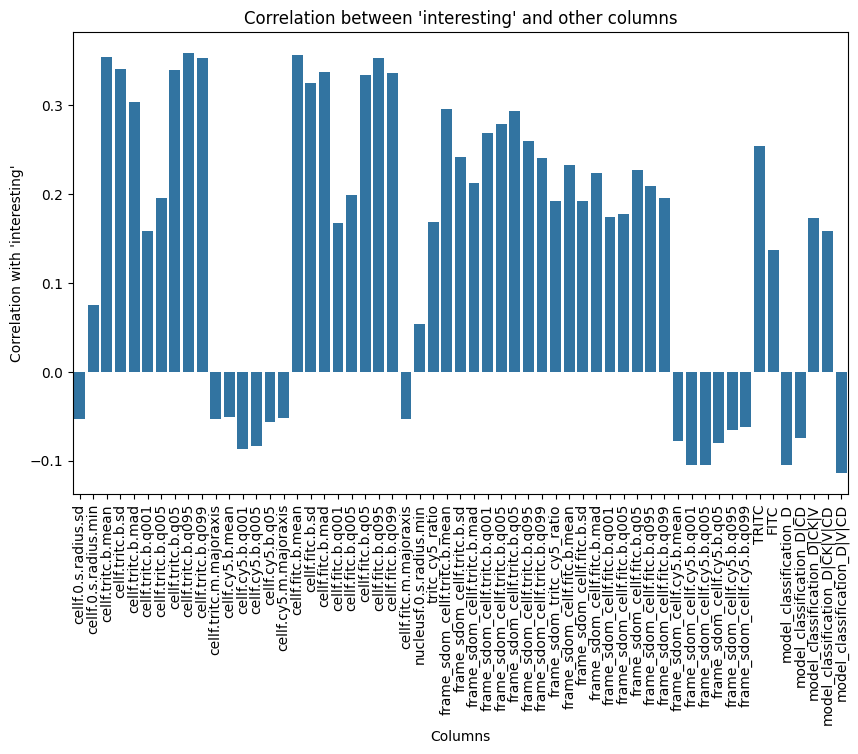

In [47]:
correlation_matrix = train_data[corr_columns].corr()
interesting_corr = correlation_matrix["interesting"].drop("interesting") 
interesting_corr = interesting_corr[interesting_corr.abs() > 0.05]
remove_columns = interesting_corr[interesting_corr.abs() < 0.01]
# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=interesting_corr.index, y=interesting_corr.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Correlation with 'interesting'")
plt.title("Correlation between 'interesting' and other columns")
plt.show()

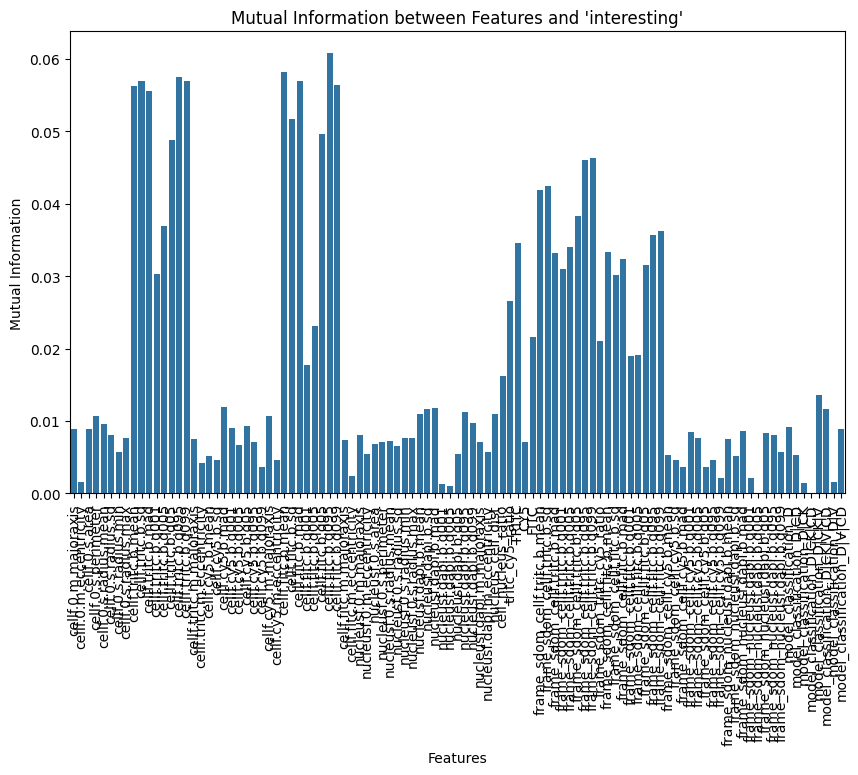

In [48]:
from sklearn.feature_selection import mutual_info_classif

X = train_data.drop(columns=["interesting"])
y = train_data["interesting"]
mi = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
# Plot the mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mutual Information', data=mi_df)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.title("Mutual Information between Features and 'interesting'")
plt.show()

In [ ]:
ros = RandomOverSampler(sampling_strategy = 'minority', random_state=42)